In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
df = pd.read_excel("C:/Users/LENOVO/Downloads/tuik_verisi_hazir.xlsx")


In [22]:
print(df.info())
print("\nAçıklayıcı İstatistikler:\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YIL            14 non-null     int64  
 1   TÜFE (%)       14 non-null     float64
 2   KUR (USD/TRY)  14 non-null     float64
 3   FAİZ (%)       14 non-null     float64
 4   İŞSİZLİK (%)   14 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 692.0 bytes
None

Açıklayıcı İstatistikler:

             YIL   TÜFE (%)  KUR (USD/TRY)   FAİZ (%)  İŞSİZLİK (%)
count    14.0000  14.000000      14.000000  14.000000     14.000000
mean   2016.5000  19.450000       6.050000  11.482143     10.714286
std       4.1833  18.617434       6.345895   7.479115      1.553585
min    2010.0000   6.200000       1.500000   4.500000      8.400000
25%    2013.2500   8.275000       2.075000   6.750000      9.525000
50%    2016.5000  11.200000       3.350000   8.125000     10.650000
75%    2019.7500  19.02500

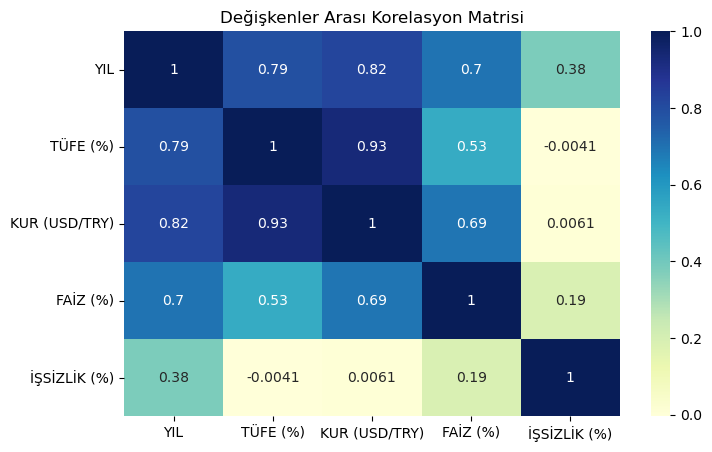

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Değişkenler Arası Korelasyon Matrisi")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# X ve y'yi tanımla
X = df[["KUR (USD/TRY)", "FAİZ (%)", "İŞSİZLİK (%)"]]
y = df["TÜFE (%)"]

# Modeli oluştur ve eğit
model = LinearRegression()
model.fit(X, y)

# Tahmin yap
y_pred = model.predict(X)

# Performans metrikleri
print("R^2 Skoru:", r2_score(y, y_pred))
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y, y_pred))


R^2 Skoru: 0.8951570330443368
Ortalama Mutlak Hata (MAE): 4.676612894766749


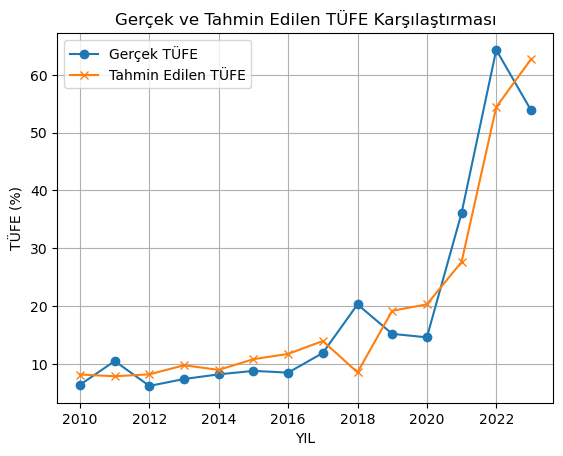

In [25]:
plt.plot(df["YIL"], y, label="Gerçek TÜFE", marker="o")
plt.plot(df["YIL"], y_pred, label="Tahmin Edilen TÜFE", marker="x")
plt.xlabel("YIL")
plt.ylabel("TÜFE (%)")
plt.title("Gerçek ve Tahmin Edilen TÜFE Karşılaştırması")
plt.legend()
plt.grid(True)
plt.savefig("grafik.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
import pandas as pd

veri = {
    "YIL": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BIST_KAPANIŞ": [668.44, 1038.91, 784.87, 676.96, 846.44, 761.42, 788.65, 1157.91, 916.27, 1147.97, 1477.16, 1857.65, 5526.55, 7470.18],
    "TÜFE (%)": [6.4, 10.5, 6.2, 7.4, 8.2, 8.8, 8.5, 11.9, 20.3, 11.8, 14.6, 19.6, 64.3, 64.8],
    "KUR (USD/TRY)": [1.5, 1.6, 1.8, 2.0, 2.2, 2.7, 3.0, 3.6, 5.3, 5.7, 7.0, 8.4, 18.0, 23.0],
    "FAİZ (%)": [7.0, 6.5, 5.8, 6.0, 6.5, 7.5, 8.0, 10.0, 24.0, 12.0, 17.0, 14.0, 9.0, 30.0],
    "İŞSİZLİK (%)": [11.9, 9.1, 8.4, 8.7, 9.9, 10.3, 10.9, 10.9, 11.0, 13.7, 13.1, 12.0, 10.2, 9.4]
}

df = pd.DataFrame(veri)
df.head()


,YIL,BIST_KAPANIŞ,TÜFE (%),KUR (USD/TRY),FAİZ (%),İŞSİZLİK (%)
0,2010,668.44,6.4,1.5,7.0,11.9
1,2011,1038.91,10.5,1.6,6.5,9.1
2,2012,784.87,6.2,1.8,5.8,8.4
3,2013,676.96,7.4,2.0,6.0,8.7
4,2014,846.44,8.2,2.2,6.5,9.9


In [27]:

df = df.sort_values("YIL")

# Eğitim verisi: 2010–2020
train = df[df["YIL"] <= 2020]

# Test verisi: 2021–2023
test = df[df["YIL"] > 2020]

X_train = train[["TÜFE (%)", "KUR (USD/TRY)", "FAİZ (%)", "İŞSİZLİK (%)"]]
y_train = train["BIST_KAPANIŞ"]

X_test = test[["TÜFE (%)", "KUR (USD/TRY)", "FAİZ (%)", "İŞSİZLİK (%)"]]
y_test = test["BIST_KAPANIŞ"]




In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)


y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Eğitim Verisi R² Skoru: {r2_train:.4f}")
print(f"Test Verisi R² Skoru: {r2_test:.4f}")
print(f"Test Verisi Ortalama Mutlak Hata (MAE): {mae_test:.2f}")



Eğitim Verisi R² Skoru: 0.8042
Test Verisi R² Skoru: 0.7515
Test Verisi Ortalama Mutlak Hata (MAE): 977.61
